In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df = pd.read_csv(r"/content/full_dataset-release.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105472 entries, 0 to 105471
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         89658 non-null   object 
 1   TWEET              105470 non-null  object 
 2   STOCK              62419 non-null   object 
 3   DATE               62419 non-null   object 
 4   LAST_PRICE         62419 non-null   float64
 5   1_DAY_RETURN       62419 non-null   float64
 6   2_DAY_RETURN       62419 non-null   float64
 7   3_DAY_RETURN       62419 non-null   float64
 8   7_DAY_RETURN       62419 non-null   float64
 9   PX_VOLUME          62419 non-null   float64
 10  VOLATILITY_10D     62415 non-null   float64
 11  VOLATILITY_30D     62409 non-null   float64
 12  LSTM_POLARITY      35182 non-null   float64
 13  TEXTBLOB_POLARITY  19369 non-null   float64
dtypes: float64(10), object(4)
memory usage: 11.3+ MB


In [4]:
df.head()

,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY
0,0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amazon,31/01/2017,823.48,0.008379,0.014924,0.014924,-0.001263,3.137196e+06,13.447,16.992,1.000,0.0,NaN
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1.0,0.0
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,1.0,0.0
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.780000,0.002011,0.012318,0.012318,5.480141e-02,9100057.000,18.769,16.099,-1.0,0.0


In [12]:
df_relevant = df[['TWEET', 'STOCK', 'DATE', 'LAST_PRICE', '1_DAY_RETURN', 'PX_VOLUME', 'VOLATILITY_10D', 'LSTM_POLARITY', 'TEXTBLOB_POLARITY']]

In [13]:
df_relevant['DATE'] = pd.to_datetime(df_relevant['DATE'], errors='coerce')

/tmp/ipython-input-3625729836.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_relevant['DATE'] = pd.to_datetime(df_relevant['DATE'], errors='coerce')
/tmp/ipython-input-3625729836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['DATE'] = pd.to_datetime(df_relevant['DATE'], errors='coerce')


In [14]:
df_relevant.head()

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,LSTM_POLARITY,TEXTBLOB_POLARITY
0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,Amazon,31/01/2017,NaT,0.008379,0.014924,13.447,16.992,0.0,NaN
2,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,2017-01-31,39.780000,0.002011,9100057.000,18.769,-1.0,0.0
3,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,2017-01-31,39.780000,0.002011,9100057.000,18.769,1.0,0.0
4,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,2017-01-31,39.780000,0.002011,9100057.000,18.769,-1.0,0.0


In [15]:
df_relevant = df_relevant.dropna(subset=['TWEET'])
df_relevant['SENTIMENT_AVG'] = df_relevant[['LSTM_POLARITY', 'TEXTBLOB_POLARITY']].mean(axis=1)

In [16]:
df_relevant.head()

,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,LSTM_POLARITY,TEXTBLOB_POLARITY,SENTIMENT_AVG
0,RT @robertoglezcano: @amazon #Patents Show Fl...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Amazon,31/01/2017,NaT,0.008379,0.014924,13.447,16.992,0.0,NaN,0.0
2,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,2017-01-31,39.780000,0.002011,9100057.000,18.769,-1.0,0.0,-0.5
3,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,2017-01-31,39.780000,0.002011,9100057.000,18.769,1.0,0.0,0.5
4,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,2017-01-31,39.780000,0.002011,9100057.000,18.769,-1.0,0.0,-0.5


In [32]:
daily = df_relevant.groupby(['STOCK','DATE']).agg(
    mean_sentiment = ('SENTIMENT_AVG', 'mean'),
    sentiment_std = ('SENTIMENT_AVG', 'std'),
    tweet_count = ('TWEET', 'count'),
    pos_tweet = ('SENTIMENT_AVG', lambda x: (x > 0).sum()),
    neg_tweet = ('SENTIMENT_AVG', lambda x: (x < 0).sum())
).reset_index()

In [19]:
price_data = df_relevant.drop_duplicates(subset=['STOCK', 'DATE'])[['STOCK','DATE','LAST_PRICE','1_DAY_RETURN','PX_VOLUME','VOLATILITY_10D']]
final = daily.merge(price_data,on=['STOCK','DATE'],how='inner')

In [20]:
final['Target'] = (final['1_DAY_RETURN'] > 0).astype(int)

In [42]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

X = final[['mean_sentiment', 'sentiment_std', 'tweet_count', 'PX_VOLUME', 'VOLATILITY_10D']]
y = final['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

X_train = X_train.copy()
X_test = X_test.copy()
X_train['sentiment_std'] = X_train['sentiment_std'].fillna(0.0)
X_test['sentiment_std'] = X_test['sentiment_std'].fillna(0.0)

pipe = Pipeline([
    ("xgb", XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        tree_method="hist",
        random_state=42,
        n_jobs=-1
    ))
])

param_grid = {
    "xgb__n_estimators": [100, 300, 500],
    "xgb__max_depth": [3, 5, 7],
    "xgb__learning_rate": [0.01, 0.05, 0.1],
    "xgb__subsample": [0.7, 0.9, 1.0],
    "xgb__colsample_bytree": [0.7, 0.9, 1.0]
}

tscv = TimeSeriesSplit(n_splits=5)

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=tscv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Best CV accuracy:", grid.best_score_)
print("Best params:", grid.best_params_)
print("Test accuracy:", grid.score(X_test, y_test))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best CV accuracy: 0.6236686390532544
Best params: {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.9}
Test accuracy: 0.6023622047244095


Enter stock name: Ford


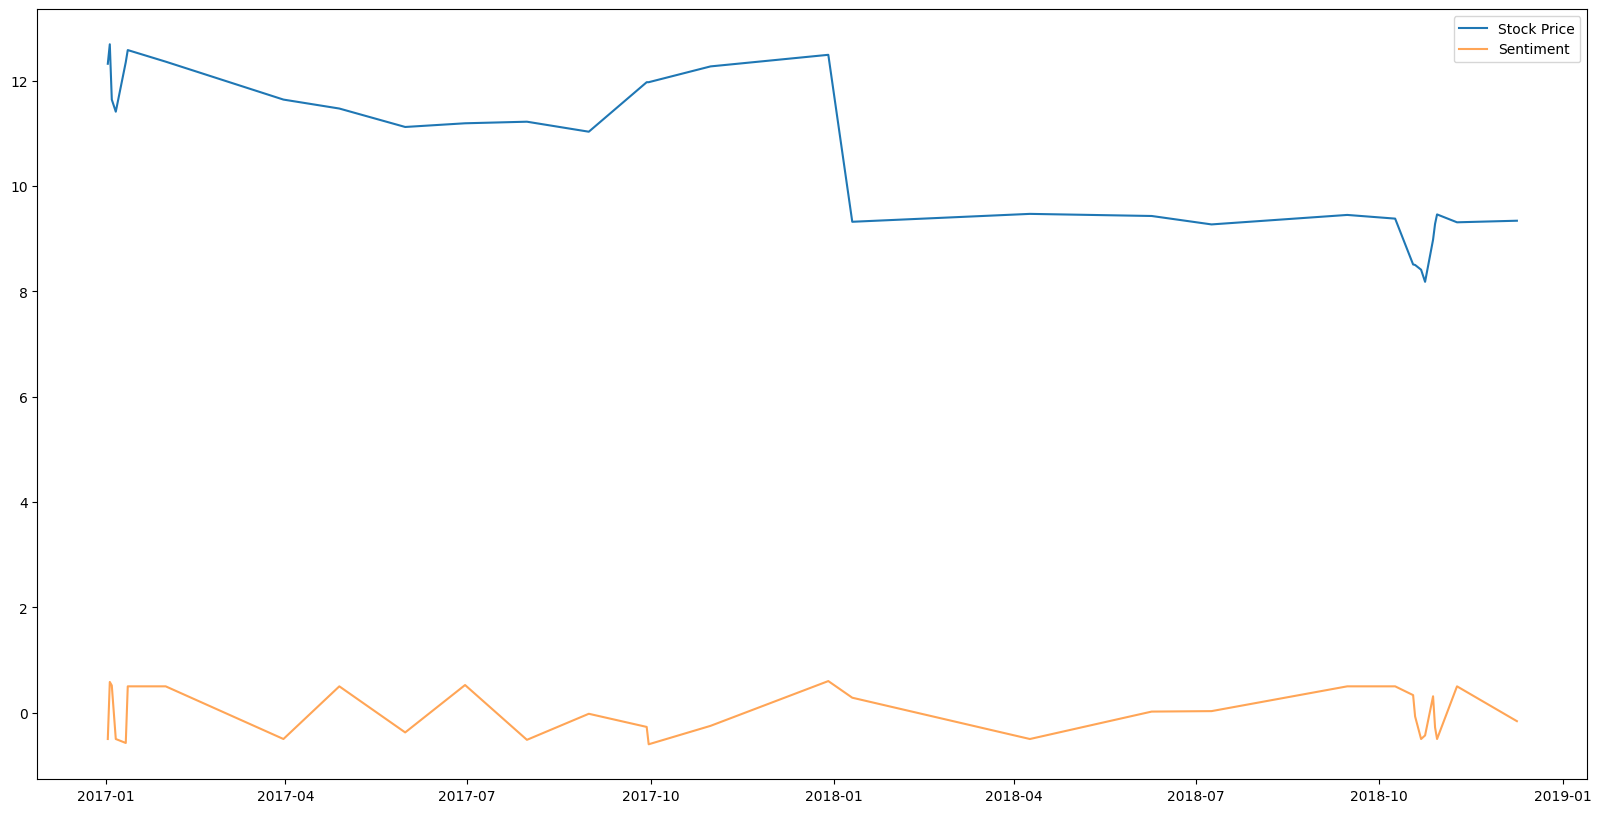

In [49]:
stock = input("Enter stock name: ")
temp = final[final['STOCK']==stock].sort_values('DATE')
plt.plot(temp['DATE'],temp['LAST_PRICE'],label = 'Stock Price')
plt.plot(temp['DATE'],temp['mean_sentiment'],label = 'Sentiment',alpha=0.7)
plt.legend()
plt.show()